# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Bùi Minh Duy	
- MSSV: 23127040
- Lớp: 23CLC01

## Import các thư viện liên quan

In [7]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


## Helper functions

In [8]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HERE
    img = Image.open(img_path).convert('RGB')
    img_array = np.array(img)
    return img_array


def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    img_display = img_2d.astype(np.uint8) 
    plt.imshow(img_display)
    plt.axis('off')
    plt.show()


def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img = Image.fromarray(img_2d.astype(np.uint8))
    img.save(img_path)


def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    h, w, c = img_2d.shape
    img_1d = img_2d.reshape(h * w, c)
    return img_1d


def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    
    # YOUR CODE HERE
    if init_centroids == 'random':
        centroids = np.random.randint(0, 256, (k_clusters, 3))
    elif init_centroids == 'in_pixels':
        idx = np.random.choice(len(img_1d), k_clusters, replace=False)
        centroids = img_1d[idx]
    else:
        raise ValueError("Unknown init_centroids method")
    
    for it in range(max_iter):
        distances = np.sum((img_1d[:, np.newaxis] - centroids)**2, axis=2)
        
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            img_1d[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
            for i in range(k_clusters)
        ])
        
        if np.allclose(new_centroids, centroids, atol=1e-3):
            print(f"Converged at iteration {it+1}")
            break

        if it == max_iter - 1:
            print(f"Reached max iterations ({max_iter}) without convergence")
        
        centroids = new_centroids

    return centroids, labels


def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''

    # YOUR CODE HERE
    h, w, c = img_2d_shape
    img_1d = centroids[labels]  
    img_2d = img_1d.reshape((h, w, c))
    return img_2d.astype(np.uint8)


## Your tests

Converged at iteration 12
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Converged at iteration 19
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without convergence
Reached max iterations (20) without 

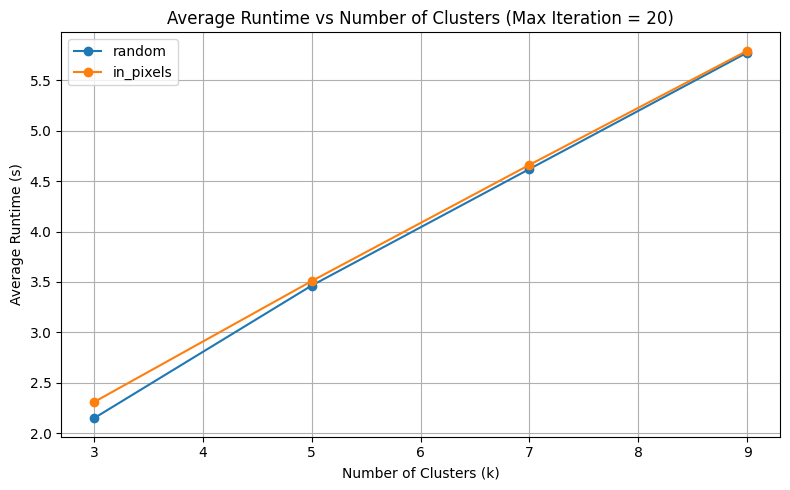

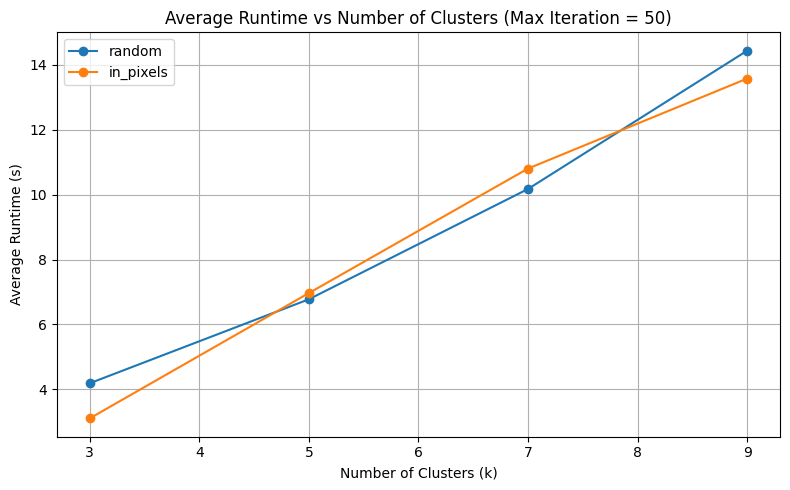

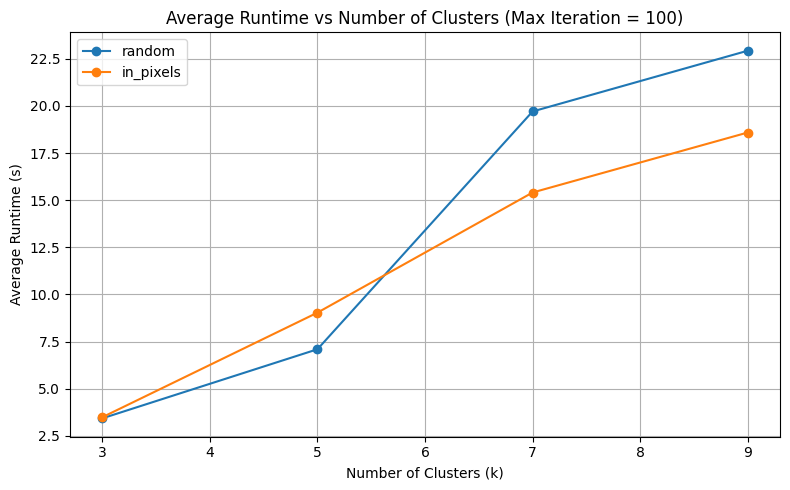

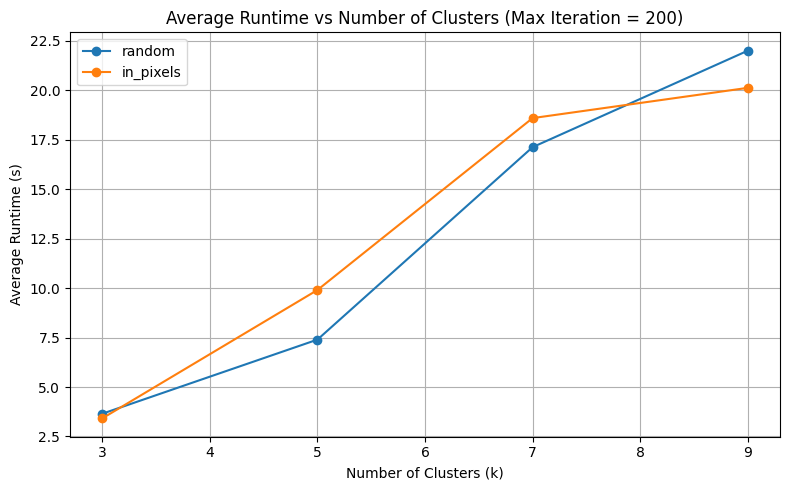

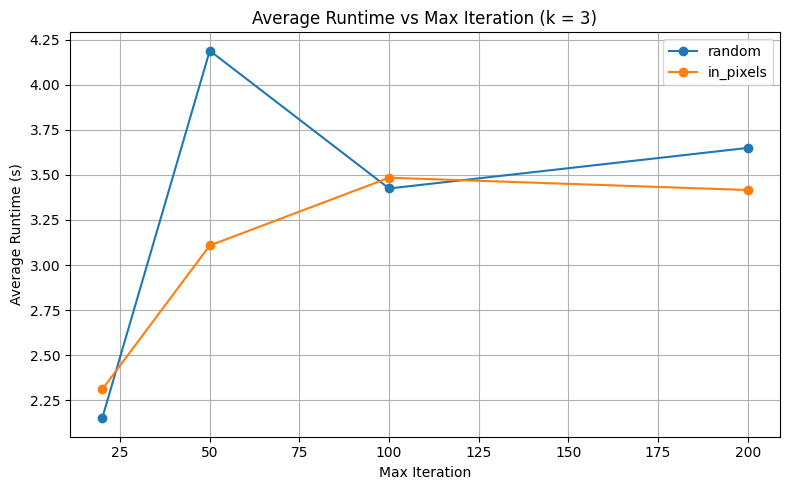

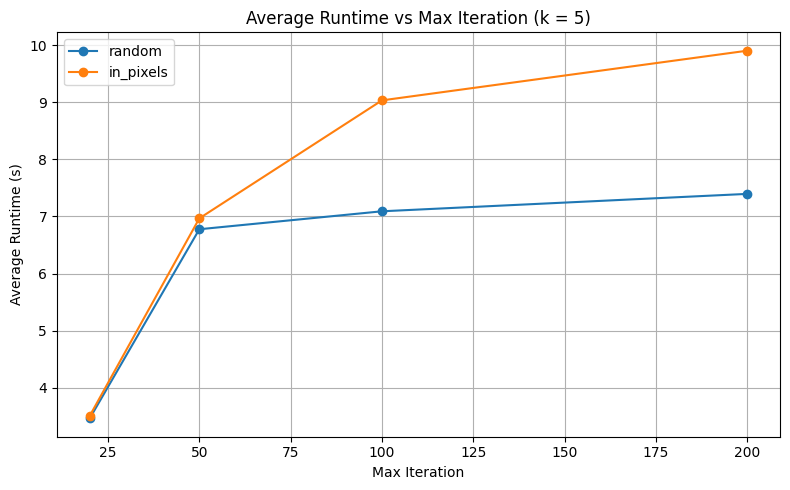

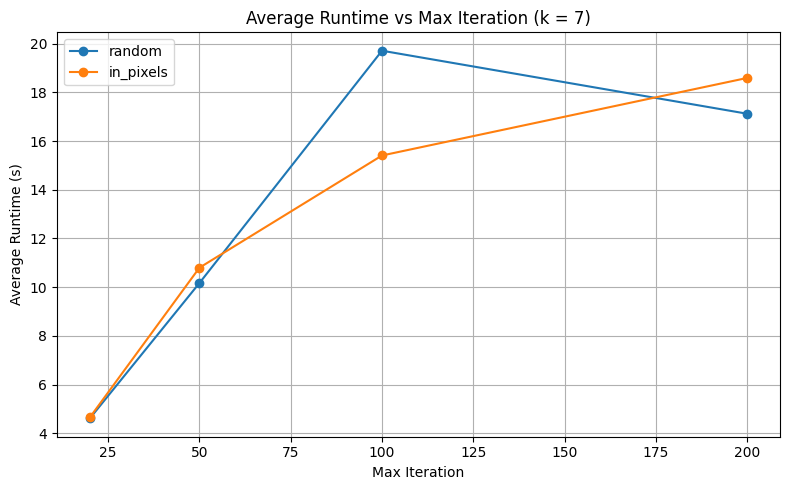

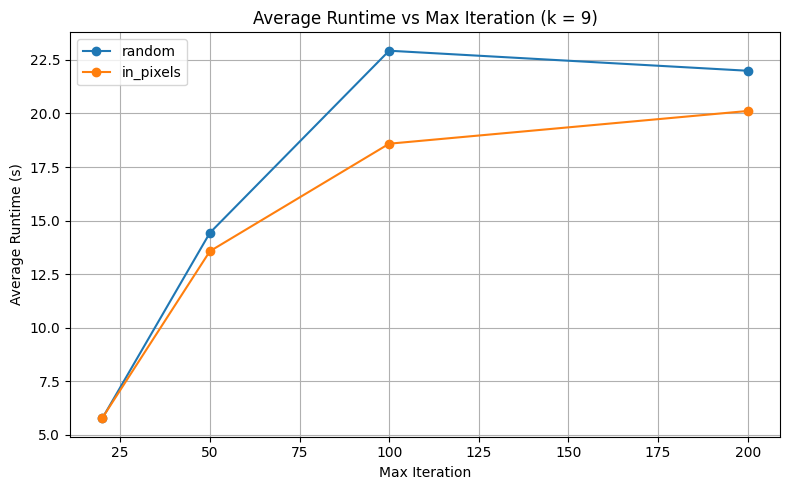

In [6]:
import time
import pandas as pd
import os

k_values = [3, 5, 7, 9]
max_iters = [20, 50, 100, 200]
methods = ['random', 'in_pixels']

input_dir = "./input"
img_files = sorted([f for f in os.listdir(input_dir) if f.lower().endswith(('.jpg', '.png'))])

img_data = []
for img_file in img_files:
    img_path = os.path.join(input_dir, img_file)
    img = Image.open(img_path).convert("RGB")
    img = img.resize((1280,720), Image.LANCZOS)
    img = np.array(img)
    img_1d = convert_img_to_1d(img)
    img_data.append((img_file, img_1d))

results = []

for max_iter in max_iters:
    for k in k_values:
        for method in methods:
            total_time = 0
            for img_file, img_1d in img_data:
                start_time = time.perf_counter()
                kmeans(img_1d, k, max_iter, method)
                elapsed_time = time.perf_counter() - start_time
                total_time += elapsed_time

            avg_time = total_time / len(img_data)
            results.append({
                'max_iter': max_iter,
                'k': k,
                'init': method,
                'avg_time': avg_time
            })

df = pd.DataFrame(results)
print(df)

for max_iter in max_iters:
    plt.figure(figsize=(8, 5))
    for method in methods:
        subset = df[(df['init'] == method) & (df['max_iter'] == max_iter)]
        plt.plot(subset['k'], subset['avg_time'], label=method, marker='o')
    plt.title(f'Average Runtime vs Number of Clusters (Max Iteration = {max_iter})')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Runtime (s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for k in k_values:
    plt.figure(figsize=(8, 5))
    for method in methods:
        subset = df[(df['init'] == method) & (df['k'] == k)]
        plt.plot(subset['max_iter'], subset['avg_time'], label=method, marker='o')
    plt.title(f'Average Runtime vs Max Iteration (k = {k})')
    plt.xlabel('Max Iteration')
    plt.ylabel('Average Runtime (s)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Main FUNCTION

In [11]:
# YOUR CODE HERE
def main():
    '''
    Main function to run color compression.
    '''
    import os
    
    img_path = input("Enter image file path: ").strip()
    if not os.path.isfile(img_path):
        print("File does not exist. Exiting.")
        return
    
    img = read_img(img_path)
    print("Original image:")
    show_img(img)
    
    ks_input = input("Enter K values separated by commas (e.g., 3,5,7): ").strip()
    try:
        ks = [int(x) for x in ks_input.split(',') if x.strip().isdigit()]
        if not ks:
            raise ValueError
    except:
        print("Invalid K values. Using default [3,5,7].")
        ks = [3, 5, 7]
    
    img_1d = convert_img_to_1d(img)
    h, w, c = img.shape

    unique_colors = np.unique(img_1d, axis=0)
    print(f"Original image has {len(unique_colors)} unique colors.")
    
    for k in ks:
        print(f"\nRunning K-Means with k = {k} ...")
        start_time = time.time()
        method = 'random'
        centroids, labels = kmeans(img_1d, k, max_iter=100, init_centroids=method)
        img_compressed = generate_2d_img((h, w, c), centroids, labels)
        
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Time executed: {elapsed_time:.2f} seconds")     

        img_compressed_1d = img_compressed.reshape(h * w, c)
        unique_colors_compressed = np.unique(img_compressed_1d, axis=0)
        print(f"Compressed image has {len(unique_colors_compressed)} unique colors.") 

        print(f"Result image for k = {k}:")
        show_img(img_compressed)

        output_dir = "output"
        os.makedirs(output_dir, exist_ok=True)
        base_name, ext = os.path.splitext(os.path.basename(img_path))
        out_png = os.path.join(output_dir, f"{base_name}_k{k}_{method}.png")
        out_pdf = os.path.join(output_dir, f"{base_name}_k{k}_{method}.pdf")
        save_img(img_compressed, out_png)
        save_img(img_compressed, out_pdf)
        print(f"Saved compressed images: {out_png}, {out_pdf}")


Original image:


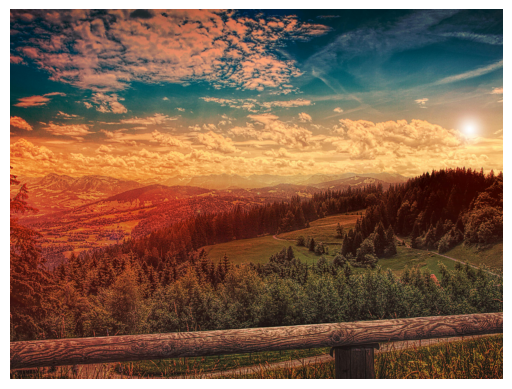

Original image has 361470 unique colors.

Running K-Means with k = 3 ...
Converged at iteration 20
Time executed: 25.28 seconds
Compressed image has 3 unique colors.
Result image for k = 3:


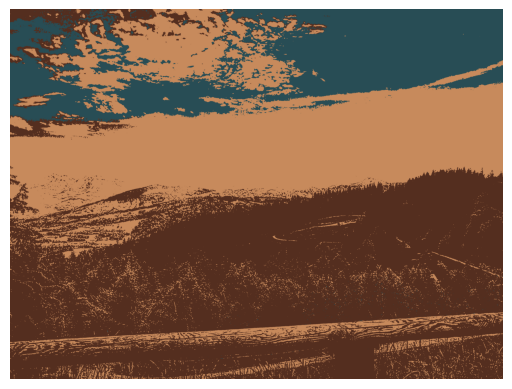

Saved compressed images: output\2_k3_random.png, output\2_k3_random.pdf

Running K-Means with k = 5 ...
Converged at iteration 47
Time executed: 89.96 seconds
Compressed image has 4 unique colors.
Result image for k = 5:


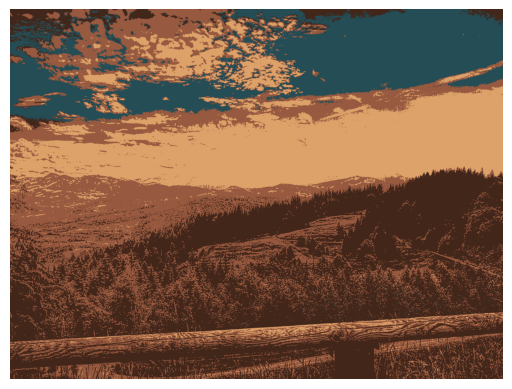

Saved compressed images: output\2_k5_random.png, output\2_k5_random.pdf

Running K-Means with k = 7 ...
Converged at iteration 65
Time executed: 168.05 seconds
Compressed image has 7 unique colors.
Result image for k = 7:


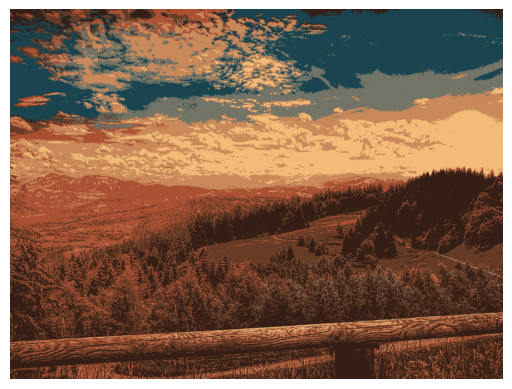

Saved compressed images: output\2_k7_random.png, output\2_k7_random.pdf

Running K-Means with k = 9 ...
Reached max iterations (100) without convergence
Time executed: 326.65 seconds
Compressed image has 9 unique colors.
Result image for k = 9:


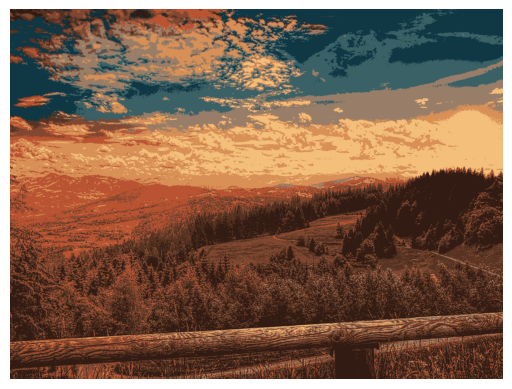

Saved compressed images: output\2_k9_random.png, output\2_k9_random.pdf


In [12]:
# Call main function
if __name__ == "__main__":
	main()
